In [1]:
# Remove unwanted warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

# Data Management
import pandas as pd
import numpy as np

from ta import add_all_ta_features

# Statistics
from statsmodels.tsa.stattools import adfuller

# Unsupervised Machine Learning
from sklearn.decomposition import PCA

# Supervised Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
import pickle 
from datetime import datetime


# Reporting
import matplotlib.pyplot as plt
import yfinance

In [46]:
df = pd.read_csv("./stock_historical_data/{}_15.csv".format("LT.NS"))
df.set_index("Datetime", inplace=True)
df["date"] = df.index

In [47]:
df_d = pd.read_csv("./stock_historical_data/{}.csv".format("LT.NS"))
df_d.set_index("Date", inplace=True)
df_d["date"] = df_d.index

In [4]:
df

,Open,High,Low,Close,Volume,date
Datetime,,,,,,
2023-01-02 09:15:00+05:30,2092.750000,2097.000000,2075.050049,2090.000000,0,2023-01-02 09:15:00+05:30
2023-01-02 10:15:00+05:30,2090.000000,2097.350098,2090.000000,2092.199951,87202,2023-01-02 10:15:00+05:30
2023-01-02 11:15:00+05:30,2092.199951,2097.600098,2083.100098,2092.300049,91963,2023-01-02 11:15:00+05:30
2023-01-02 12:15:00+05:30,2091.399902,2094.500000,2087.000000,2092.600098,85378,2023-01-02 12:15:00+05:30
2023-01-02 13:15:00+05:30,2092.649902,2095.000000,2085.000000,2086.050049,122805,2023-01-02 13:15:00+05:30
...,...,...,...,...,...,...
2023-07-11 11:15:00+05:30,2473.050049,2474.649902,2457.449951,2457.750000,236741,2023-07-11 11:15:00+05:30
2023-07-11 12:15:00+05:30,2457.750000,2476.000000,2456.000000,2474.050049,172491,2023-07-11 12:15:00+05:30
2023-07-11 13:15:00+05:30,2473.800049,2475.850098,2468.750000,2472.199951,114636,2023-07-11 13:15:00+05:30


In [48]:
merged_data = []
for i in range(1,len(df_d)):
    if i < len(df_d)-1:
        currentDate = df_d.iloc[i+1].date
        #print(currentDate)
        filterd = df[df["date"] == "{} 11:15:00+05:30".format(currentDate)]
        if len(filterd) > 0:
             merged_data.append({
                "Open" : df_d.iloc[i].Open,
                "Close" : df_d.iloc[i].Close,
                "High" : df_d.iloc[i].High,
                "Low" : df_d.iloc[i].Low,
                "Volume" :df_d.iloc[i].Volume,
                "date" : df_d.iloc[i].date,
                "nextDay" : filterd.Close.values[0],
                "dnextDay" : filterd.date.values[0],

            })
     

merged_df = pd.DataFrame(merged_data)
merged_df.head(20)


,Open,Close,High,Low,Volume,date,nextDay,dnextDay
0,1863.486281,1871.928223,1882.986561,1863.436985,1145546,2021-12-31,1919.599976,2022-01-03 11:15:00+05:30
1,1871.039515,1898.537354,1912.952726,1869.706608,1906676,2022-01-03,1925.949951,2022-01-04 11:15:00+05:30
2,1898.537309,1913.051514,1918.432555,1890.342327,1643920,2022-01-04,1934.750000,2022-01-05 11:15:00+05:30
3,1916.161656,1923.961792,1926.331470,1903.276733,1711667,2022-01-05,1925.400024,2022-01-06 11:15:00+05:30
4,1919.913623,1900.166504,1928.306148,1895.328436,1372015,2022-01-06,1906.650024,2022-01-07 11:15:00+05:30
5,1904.659001,1880.814331,1910.484304,1873.162323,1447123,2022-01-07,1920.599976,2022-01-10 11:15:00+05:30
6,1885.849889,1928.404907,1935.168271,1883.134660,2397846,2022-01-10,1957.199951,2022-01-11 11:15:00+05:30
7,1924.356750,1936.353149,1945.091225,1913.150285,2232435,2022-01-11,1975.300049,2022-01-12 11:15:00+05:30
8,1953.483716,1949.238037,1958.914173,1935.513886,1585970,2022-01-12,1997.500000,2022-01-13 11:15:00+05:30
9,1950.571094,1992.879272,2003.345221,1950.571094,2373324,2022-01-13,2042.500000,2022-01-14 11:15:00+05:30


In [49]:
df = add_all_ta_features(merged_df, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)

In [50]:
#df['date'] = pd.to_datetime(df.index)
df.set_index("date", inplace=True)


In [51]:
df = df.drop('dnextDay', axis=1)


In [52]:
df = df.dropna()

In [53]:
# Identify non-stationary columns

non_stationaries = []
for col in df.columns:
    if col != "volatility_bbli":
        print(col)
        dftest = adfuller(df[col].values)
        p_value = dftest[1]
        t_test = dftest[0] < dftest[4]["1%"]
        if p_value > 0.05 or not t_test:
            non_stationaries.append(col)
print(f"Non-Stationary Features Found: {len(non_stationaries)}")

Open
Close
High
Low
Volume
nextDay
volume_adi
volume_obv
volume_cmf
volume_fi
volume_em
volume_sma_em
volume_vpt
volume_vwap
volume_mfi
volume_nvi
volatility_bbm
volatility_bbh
volatility_bbl
volatility_bbw
volatility_bbp
volatility_bbhi
volatility_kcc
volatility_kch
volatility_kcl
volatility_kcw
volatility_kcp
volatility_kchi
volatility_kcli
volatility_dcl
volatility_dch
volatility_dcm
volatility_dcw
volatility_dcp
volatility_atr
volatility_ui
trend_macd
trend_macd_signal
trend_macd_diff
trend_sma_fast
trend_sma_slow
trend_ema_fast
trend_ema_slow
trend_vortex_ind_pos
trend_vortex_ind_neg
trend_vortex_ind_diff
trend_trix
trend_mass_index
trend_dpo
trend_kst
trend_kst_sig
trend_kst_diff
trend_ichimoku_conv
trend_ichimoku_base
trend_ichimoku_a
trend_ichimoku_b
trend_stc
trend_adx
trend_adx_pos
trend_adx_neg
trend_cci
trend_visual_ichimoku_a
trend_visual_ichimoku_b
trend_aroon_up
trend_aroon_down
trend_aroon_ind
trend_psar_up
trend_psar_down
trend_psar_up_indicator
trend_psar_down_indicat

In [54]:
df_stationary = df.copy()
df_stationary[non_stationaries] = df_stationary[non_stationaries].pct_change()
df_stationary = df_stationary.iloc[1:]

In [55]:
# Find NaN Rows
na_list = df_stationary.columns[df_stationary.isna().any().tolist()]
df_stationary.drop(columns=na_list, inplace=True)

In [56]:
# Handle inf values
df_stationary.replace([np.inf, -np.inf], 0, inplace=True)
df_stationary.head()

,Open,Close,High,Low,Volume,nextDay,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,0.004053,0.014215,0.015914,0.003365,1906676,0.003308,-4.225104,1.664426,0.158945,5.073499e+07,...,0.000000,0.000000,0.090620,5.051636,1.010327,4.041309,0.004309,1.421482,1.411474,0.000000
2022-01-04,0.014697,0.007645,0.002865,0.011037,1643920,0.004569,2.090333,0.538598,0.319246,4.689572e+07,...,1.313956,2.113956,0.191567,7.016846,2.211631,4.805215,0.005033,0.764492,0.761584,0.545458
2022-01-05,0.009283,0.005703,0.004117,0.006842,1711667,-0.004833,0.907001,0.364484,0.446179,4.286416e+07,...,0.607943,0.994850,0.280734,8.768315,3.522968,5.245347,0.006601,0.570308,0.568688,0.265307
2022-01-06,0.001958,-0.012368,0.001025,-0.004176,1372015,-0.009738,-0.339083,-0.214116,0.242882,3.207678e+07,...,0.045386,0.426152,0.239890,8.012454,4.420865,3.591589,-0.000315,-1.236786,-1.244498,-0.457306
2022-01-07,-0.007945,-0.010184,-0.009242,-0.011695,1447123,0.007316,-0.451807,-0.287367,0.112264,2.349367e+07,...,-0.162962,0.167501,0.134472,7.762246,5.089141,2.673105,-0.003794,-1.018446,-1.023668,-0.685317


In [57]:
# Set Target (for Supervised ML later on)
df_stationary["TARGET"] = -1
df_stationary.loc[df_stationary["Close"].shift(-1) > df_stationary["Close"], "TARGET"] = 1
df_stationary.dropna(inplace=True)

In [58]:
df_stationary

,Open,Close,High,Low,Volume,nextDay,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr,TARGET
date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,0.004053,0.014215,0.015914,0.003365,1906676,0.003308,-4.225104,1.664426,0.158945,5.073499e+07,...,0.000000,0.090620,5.051636,1.010327,4.041309,0.004309,1.421482,1.411474,0.000000,-1
2022-01-04,0.014697,0.007645,0.002865,0.011037,1643920,0.004569,2.090333,0.538598,0.319246,4.689572e+07,...,2.113956,0.191567,7.016846,2.211631,4.805215,0.005033,0.764492,0.761584,0.545458,-1
2022-01-05,0.009283,0.005703,0.004117,0.006842,1711667,-0.004833,0.907001,0.364484,0.446179,4.286416e+07,...,0.994850,0.280734,8.768315,3.522968,5.245347,0.006601,0.570308,0.568688,0.265307,-1
2022-01-06,0.001958,-0.012368,0.001025,-0.004176,1372015,-0.009738,-0.339083,-0.214116,0.242882,3.207678e+07,...,0.426152,0.239890,8.012454,4.420865,3.591589,-0.000315,-1.236786,-1.244498,-0.457306,1
2022-01-07,-0.007945,-0.010184,-0.009242,-0.011695,1447123,0.007316,-0.451807,-0.287367,0.112264,2.349367e+07,...,0.167501,0.134472,7.762246,5.089141,2.673105,-0.003794,-1.018446,-1.023668,-0.685317,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-04,-0.008070,0.003178,-0.003210,0.004167,1441581,-0.002361,-0.049738,0.022569,0.230646,2.813342e+07,...,0.049786,0.315702,-11.856939,-9.652419,-2.204520,0.002744,0.317844,0.317340,0.013399,1
2023-07-05,0.001139,0.003635,0.000221,-0.001566,1191896,0.008455,0.004509,0.018248,0.190749,2.563827e+07,...,0.045965,0.305985,-12.744934,-10.270922,-2.474012,0.003111,0.363546,0.362887,0.015171,1
2023-07-06,0.002885,0.007204,0.006036,0.005378,1796824,-0.012717,0.026955,0.027017,0.172445,2.654474e+07,...,0.045073,0.313835,-10.143463,-10.245430,0.101967,0.003672,0.720416,0.717834,0.029723,-1


In [59]:
# Split Target from Featureset
X = df_stationary.iloc[:, :-1]
y = df_stationary.iloc[:, -1]

In [60]:
# Feature Scaling
df_sc = df_stationary.copy()
X_fs = StandardScaler().fit_transform(X)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_fs, y, test_size=0.7, random_state=42)

In [62]:
classifier = RandomForestClassifier(n_estimators=12, max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")
print(f"Test Precision: {precision}")

Test Accuracy: 0.6106870229007634
Test Precision: 0.6046511627906976


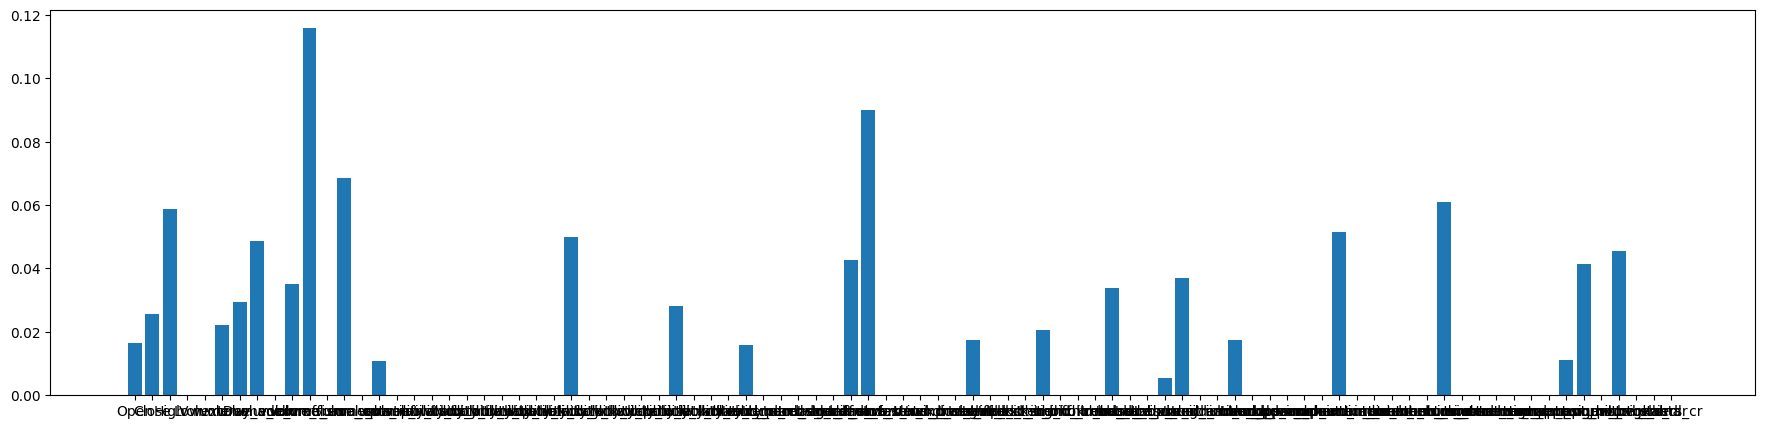

In [63]:
# Plot Feature Importances
fig = plt.figure(figsize=(22, 5))
importance_labels = X.columns
importance_features = classifier.feature_importances_
plt.bar(importance_labels, importance_features)
plt.show()

In [64]:
# Select Best Features
mean_feature_importance = importance_features.mean()
i = 0
recommended_feature_labels = []
recommended_feature_score = []
for fi in importance_features:
    if fi > mean_feature_importance:
        recommended_feature_labels.append(importance_labels[i])
        recommended_feature_score.append(fi)
    i += 1

/var/folders/4_/_fbkdkz531s_92lxx_c_x6n00000gn/T/ipykernel_1972/3002898103.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


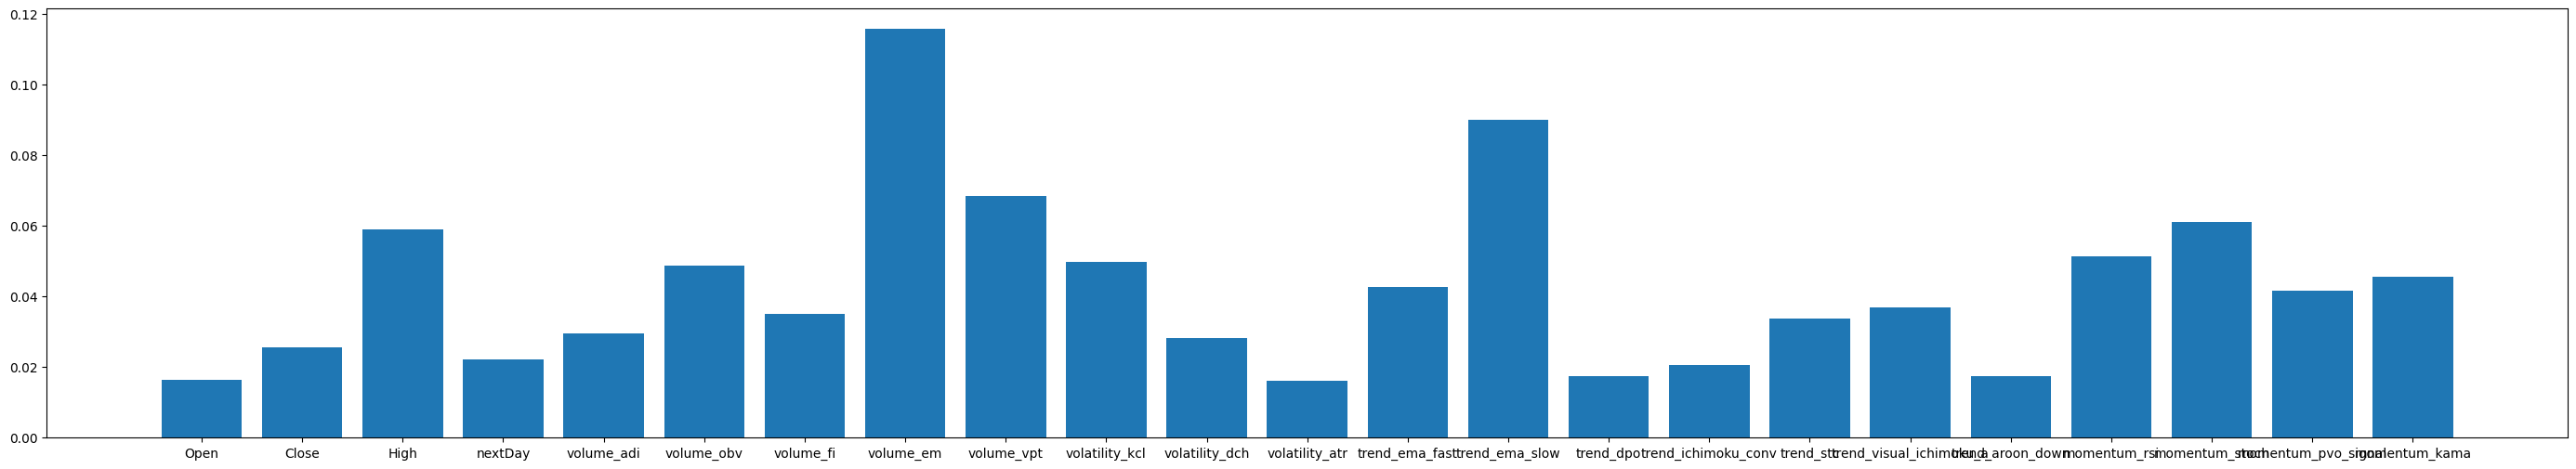

In [65]:
fig, ax = plt.subplots(figsize=(35, 6))

ax.bar(recommended_feature_labels, recommended_feature_score)
fig.show()